In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   sklearn.preprocessing import MinMaxScaler
from   tensorflow.keras import Sequential
from   tensorflow.keras.layers import Dense, Dropout, GRU, LSTM
import yfinance as yf

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint

In [32]:
STOCKS = [
    '^GSPC', 'AAXN', 'ABMD', 'ANET', 'AYX', 'BIDU', 'DDOG', 'DOCU', 
    'EDIT', 'ETSY', 'FSLY', 'GH', 'ISRG', 'LYV', 'MDB', 'MELI', 'MTCH', 
    'NVCR', 'OKTA', 'PANW', 'PINS', 'PTON', 'ROKU', 'SHOP', 'TDOC', 
    'TEAM', 'TREX', 'TTD', 'TTWO', 'VEEV', 'ZEN', 'ZG']
VARS = STOCKS + [f'{s}_VOL' for s in STOCKS]
tickers = ' '.join(STOCKS)

In [33]:
dat = yf.download(tickers, start='1970-01-01')
dat.head()

[*********************100%***********************]  32 of 32 completed


Adj Close                                              ... Volume  \
                AAXN ABMD ANET AYX BIDU DDOG DOCU EDIT ETSY FSLY  ...   SHOP   
Date                                                              ...          
1970-01-02       NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
1970-01-05       NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
1970-01-06       NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
1970-01-07       NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
1970-01-08       NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   

                                                           
           TDOC TEAM TREX TTD TTWO VEEV ZEN  ZG     ^GSPC  
Date                                                       
1970-01-02  NaN  NaN  NaN NaN  NaN  NaN NaN NaN   8050000  
1970-01-05  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  11490000  
1970-01-06  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  11460000  
1970-01-07  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  10010000  
1970-01-08  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  10670000  

[5 rows x 192 columns]

In [34]:
def rename(names):
    return f'{names[1]}_{names[0].replace(" ", "_")}'

In [35]:
dat.columns = [rename(x) for x in dat.columns]
dat.head()

,AAXN_Adj_Close,ABMD_Adj_Close,ANET_Adj_Close,AYX_Adj_Close,BIDU_Adj_Close,DDOG_Adj_Close,DOCU_Adj_Close,EDIT_Adj_Close,ETSY_Adj_Close,FSLY_Adj_Close,...,SHOP_Volume,TDOC_Volume,TEAM_Volume,TREX_Volume,TTD_Volume,TTWO_Volume,VEEV_Volume,ZEN_Volume,ZG_Volume,^GSPC_Volume
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8050000
1970-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11490000
1970-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11460000
1970-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10010000
1970-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10670000


In [36]:
#keep = [x for x in list(dat) if 'Adj' in x] 
#dat = dat[keep]
dat.rename(columns={x: x.replace('_Adj_Close', '').replace('Volume', 'VOL') for x in list(dat)},
           inplace=True)
dat = dat[VARS] # keep same ordering
dat.head()

,^GSPC,AAXN,ABMD,ANET,AYX,BIDU,DDOG,DOCU,EDIT,ETSY,...,ROKU_VOL,SHOP_VOL,TDOC_VOL,TEAM_VOL,TREX_VOL,TTD_VOL,TTWO_VOL,VEEV_VOL,ZEN_VOL,ZG_VOL
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,93.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,93.459999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-06,92.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-07,92.629997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,92.680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
dat.tail()

,^GSPC,AAXN,ABMD,ANET,AYX,BIDU,DDOG,DOCU,EDIT,ETSY,...,ROKU_VOL,SHOP_VOL,TDOC_VOL,TEAM_VOL,TREX_VOL,TTD_VOL,TTWO_VOL,VEEV_VOL,ZEN_VOL,ZG_VOL
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-26,3009.050049,96.059998,239.270004,210.630005,162.419998,121.800003,84.500000,177.580002,28.920000,102.540001,...,7984100.0,2720800.0,10468400.0,2898700.0,6964600.0,2856600.0,3061300.0,1469000.0,2524300.0,1056300.0
2020-06-29,3053.239990,95.800003,240.220001,206.910004,160.490005,121.290001,83.720001,171.669998,29.340000,102.889999,...,12073800.0,2740500.0,2830800.0,1071800.0,822300.0,1720700.0,1555300.0,1074000.0,1751400.0,446500.0
2020-06-30,3100.290039,98.129997,241.559998,210.029999,164.279999,119.889999,86.949997,172.210007,29.580000,106.230003,...,5845900.0,2749100.0,1585600.0,1312500.0,984400.0,1704700.0,3111500.0,1058400.0,1734800.0,523800.0
2020-07-01,3115.860107,99.370003,255.220001,209.440002,175.220001,120.629997,89.379997,178.960007,30.850000,111.209999,...,15001800.0,3448300.0,1986300.0,1222300.0,927800.0,2230500.0,2025400.0,933500.0,2858600.0,394000.0
2020-07-02,3130.010010,100.339996,263.839996,210.509995,173.919998,123.300003,89.589996,190.990005,30.530001,110.680000,...,12149400.0,3454400.0,2414600.0,2275400.0,641600.0,2272700.0,1578700.0,990600.0,3672400.0,583100.0


In [38]:
data = dat.copy()
original_dates = dat.index

In [39]:
data.sort_index(inplace=True, ascending=False)
data.head()

,^GSPC,AAXN,ABMD,ANET,AYX,BIDU,DDOG,DOCU,EDIT,ETSY,...,ROKU_VOL,SHOP_VOL,TDOC_VOL,TEAM_VOL,TREX_VOL,TTD_VOL,TTWO_VOL,VEEV_VOL,ZEN_VOL,ZG_VOL
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-02,3130.010010,100.339996,263.839996,210.509995,173.919998,123.300003,89.589996,190.990005,30.530001,110.680000,...,12149400.0,3454400.0,2414600.0,2275400.0,641600.0,2272700.0,1578700.0,990600.0,3672400.0,583100.0
2020-07-01,3115.860107,99.370003,255.220001,209.440002,175.220001,120.629997,89.379997,178.960007,30.850000,111.209999,...,15001800.0,3448300.0,1986300.0,1222300.0,927800.0,2230500.0,2025400.0,933500.0,2858600.0,394000.0
2020-06-30,3100.290039,98.129997,241.559998,210.029999,164.279999,119.889999,86.949997,172.210007,29.580000,106.230003,...,5845900.0,2749100.0,1585600.0,1312500.0,984400.0,1704700.0,3111500.0,1058400.0,1734800.0,523800.0
2020-06-29,3053.239990,95.800003,240.220001,206.910004,160.490005,121.290001,83.720001,171.669998,29.340000,102.889999,...,12073800.0,2740500.0,2830800.0,1071800.0,822300.0,1720700.0,1555300.0,1074000.0,1751400.0,446500.0
2020-06-26,3009.050049,96.059998,239.270004,210.630005,162.419998,121.800003,84.500000,177.580002,28.920000,102.540001,...,7984100.0,2720800.0,10468400.0,2898700.0,6964600.0,2856600.0,3061300.0,1469000.0,2524300.0,1056300.0


In [40]:
def prep_stocks(data, stocks, start_date):
    start_date = pd.to_datetime(start_date)
    stocks = data.loc[data.index >= start_date, stocks]
    stocks.sort_index(ascending=True, inplace=True)
    stocks.dropna(inplace=True)
    stocks = np.log(stocks)
    stocks /= stocks.iloc[0, :]
    return stocks

In [41]:
USE = ['^GSPC', '^GSPC_VOL']
stockdat = prep_stocks(data.copy(), USE, '1970-01-01')

In [42]:
stockdat.head()

,^GSPC,^GSPC_VOL
Date,,
1970-01-02,1.000000,1.000000
1970-01-05,1.001089,1.022376
1970-01-06,0.999573,1.022212
1970-01-07,0.999120,1.013704
1970-01-08,0.999240,1.017720


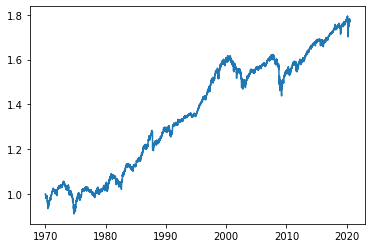

In [43]:
plt.plot(stockdat['^GSPC']);

In [44]:
input_feature = stockdat.values
input_data = input_feature.copy()

In [183]:
LOOKBACK = 125
N_AHEAD = 20
VALID_FRAC = 0.15
TEST_FRAC = 0.15
RNN_CELL = GRU
RNN_LAYERS = 3
RNN_UNITS = 60
EPOCHS = 1000
BATCH = 64
DROPOUT = 0.001
#RECURRENT_DROPOUT = 0
ETA = 0.001
DECAY = 0.0001

In [184]:
def get_datasets(input_data, lookback, n_ahead, X=['^GSPC'], y='^GSPC'):
    yi = list(stockdat).index(y)
    Xi = [list(stockdat).index(x) for x in X]
    valid_size = int(VALID_FRAC * len(data))
    test_size = int(TEST_FRAC * len(data))
    train_size = len(data) - valid_size - test_size

    X, y = [], []
    for i in range(lookback + 1, len(input_data) - n_ahead):
        t = []
        for j in range(lookback, 0, -1):
            t.append(input_data[[i - j], Xi])
        X.append(t)
        y.append(input_data[i + n_ahead, yi])
    X, y = np.array(X), np.array(y)
    
    X_train = X[:train_size]
    X_valid = X[train_size:(train_size + valid_size)]
    X_test = X[(train_size + valid_size):]
    y_train = y[:train_size]
    y_valid = y[train_size:(train_size + valid_size)]
    y_test = y[(train_size + valid_size):]
    X_train = X_train.reshape(X_train.shape[0], lookback, -1)
    X_valid = X_valid.reshape(X_valid.shape[0], lookback, -1)
    X_test = X_test.reshape(X_test.shape[0], lookback, -1)
    print(X_train.shape, y_train.shape)
    print(X_valid.shape, y_valid.shape)
    print(X_test.shape, y_test.shape)
    
    return [[X_train, y_train], [X_valid, y_valid], [X_test, y_test]]

In [185]:
[[X_train, y_train], [X_valid, y_valid], [X_test, y_test]] = get_datasets(input_data, LOOKBACK, N_AHEAD, X=USE)

(8918, 125, 2) (8918,)
(1911, 125, 2) (1911,)
(1765, 125, 2) (1765,)


In [193]:
def make_mod(X_train, y_train, activation='relu'):
    model = Sequential()
    model.add(
        RNN_CELL(units=RNN_UNITS, 
                 return_sequences= True, 
                 dropout=DROPOUT,
                 #recurrent_dropout=RECURRENT_DROPOUT,
                 activation=activation,
                 input_shape=(X_train.shape[1], X_train.shape[2])))
    if RNN_LAYERS > 2:
        for _ in range(RNN_LAYERS - 1):
            model.add(
                RNN_CELL(units=RNN_UNITS, 
                         return_sequences=True,
                         activation=activation,
                         #recurrent_dropout=RECURRENT_DROPOUT,
                         dropout=DROPOUT))
    model.add(
        RNN_CELL(units=RNN_UNITS, 
                 activation=activation,
                 #recurrent_dropout=RECURRENT_DROPOUT,
                 dropout=DROPOUT))
    model.add(Dense(units=1))
    model.add(Dropout(DROPOUT))
    print(model.summary())
    return model

In [194]:
def compile_mod(mod):
    mod.compile(learning_rate=ETA, 
                decay=DECAY,
                optimizer='adam', 
                loss='mean_squared_error')
    return mod

In [195]:
def plot_mod(history):
    plt.plot(np.sqrt(history.history['loss']), color='k', label='train')
    plt.plot(
        np.sqrt(history.history['val_loss']), color='r', label='valid')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend();

# S&P

In [196]:
Y = '^GSPC'
[[X_train, y_train], 
 [X_valid, y_valid], 
 [X_test, y_test]] = get_datasets(
    input_data, LOOKBACK, n_ahead=N_AHEAD, X=USE, y=Y)
X_train.shape

(8918, 125, 2) (8918,)
(1911, 125, 2) (1911,)
(1765, 125, 2) (1765,)


(8918, 125, 2)

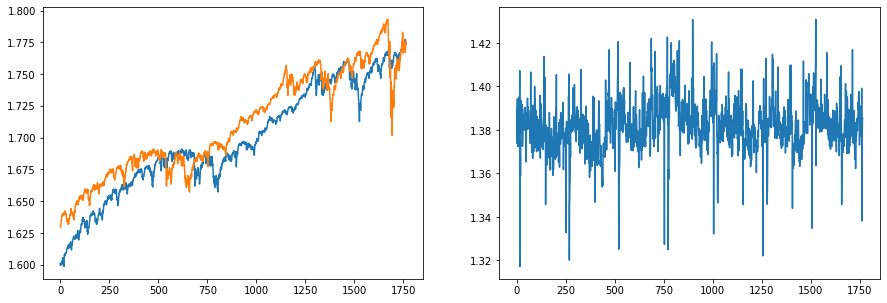

In [197]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(X_test[:, 0, 0])
plt.plot(y_test[:]);

plt.subplot(122)
plt.plot(X_test[:, 0, 1]);

In [198]:
mod = make_mod(X_train, y_train, activation='sigmoid')
mod = compile_mod(mod)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_32 (GRU)                 (None, 125, 60)           11520     
_________________________________________________________________
gru_33 (GRU)                 (None, 125, 60)           21960     
_________________________________________________________________
gru_34 (GRU)                 (None, 125, 60)           21960     
_________________________________________________________________
gru_35 (GRU)                 (None, 60)                21960     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 61        
_________________________________________________________________
dropout_8 (Dropout)          (None, 1)                 0         
Total params: 77,461
Trainable params: 77,461
Non-trainable params: 0
__________________________________________________

In [199]:
history = mod.fit(X_train, y_train, 
                  validation_data=(X_valid, y_valid),
                  epochs=EPOCHS, 
                  batch_size=BATCH)

Train on 8918 samples, validate on 1911 samples
Epoch 1/1000
8918/8918 [==============================] - 106s 12ms/sample - loss: 0.2237 - val_loss: 0.1010
Epoch 2/1000
8918/8918 [==============================] - 120s 14ms/sample - loss: 0.0473 - val_loss: 0.0947
Epoch 3/1000
8918/8918 [==============================] - 73s 8ms/sample - loss: 0.0466 - val_loss: 0.1024
Epoch 4/1000
8918/8918 [==============================] - 62s 7ms/sample - loss: 0.0464 - val_loss: 0.1123
Epoch 5/1000
8918/8918 [==============================] - 62s 7ms/sample - loss: 0.0472 - val_loss: 0.0967
Epoch 6/1000
8918/8918 [==============================] - 62s 7ms/sample - loss: 0.0288 - val_loss: 0.0020
Epoch 7/1000
8918/8918 [==============================] - 63s 7ms/sample - loss: 0.0209 - val_loss: 0.0114
Epoch 8/1000
8918/8918 [==============================] - 62s 7ms/sample - loss: 0.0040 - val_loss: 9.4158e-04
Epoch 9/1000
8918/8918 [==============================] - 62s 7ms/sample - loss: 0.0016 

Epoch 74/1000
8918/8918 [==============================] - 63s 7ms/sample - loss: 9.8178e-04 - val_loss: 1.9891e-04
Epoch 75/1000
8918/8918 [==============================] - 65s 7ms/sample - loss: 0.0023 - val_loss: 1.9968e-04
Epoch 76/1000
8918/8918 [==============================] - 63s 7ms/sample - loss: 0.0012 - val_loss: 3.1240e-04
Epoch 77/1000
8918/8918 [==============================] - 63s 7ms/sample - loss: 0.0011 - val_loss: 2.1956e-04
Epoch 78/1000
8918/8918 [==============================] - 64s 7ms/sample - loss: 0.0018 - val_loss: 1.9911e-04
Epoch 79/1000
8918/8918 [==============================] - 64s 7ms/sample - loss: 0.0025 - val_loss: 2.1155e-04
Epoch 80/1000
8918/8918 [==============================] - 61s 7ms/sample - loss: 0.0016 - val_loss: 4.9881e-04
Epoch 81/1000
8918/8918 [==============================] - 60s 7ms/sample - loss: 0.0033 - val_loss: 3.2946e-04
Epoch 82/1000
8918/8918 [==============================] - 60s 7ms/sample - loss: 0.0013 - val_loss:

8918/8918 [==============================] - 59s 7ms/sample - loss: 6.9061e-04 - val_loss: 2.4566e-04
Epoch 147/1000
8918/8918 [==============================] - 59s 7ms/sample - loss: 0.0010 - val_loss: 2.0314e-04
Epoch 148/1000
8918/8918 [==============================] - 59s 7ms/sample - loss: 0.0016 - val_loss: 3.2469e-04
Epoch 149/1000
8918/8918 [==============================] - 58s 7ms/sample - loss: 0.0015 - val_loss: 2.6669e-04
Epoch 150/1000
8918/8918 [==============================] - 59s 7ms/sample - loss: 0.0037 - val_loss: 2.2972e-04
Epoch 151/1000
8918/8918 [==============================] - 60s 7ms/sample - loss: 0.0016 - val_loss: 2.0567e-04
Epoch 152/1000
8918/8918 [==============================] - 60s 7ms/sample - loss: 0.0011 - val_loss: 1.8936e-04
Epoch 153/1000
8918/8918 [==============================] - 59s 7ms/sample - loss: 0.0017 - val_loss: 1.8121e-04
Epoch 154/1000
8918/8918 [==============================] - 60s 7ms/sample - loss: 0.0020 - val_loss: 2.593

8918/8918 [==============================] - 59s 7ms/sample - loss: 9.6787e-04 - val_loss: 1.5744e-04
Epoch 219/1000
8918/8918 [==============================] - 59s 7ms/sample - loss: 0.0018 - val_loss: 3.7040e-04
Epoch 220/1000
8918/8918 [==============================] - 63s 7ms/sample - loss: 0.0020 - val_loss: 2.7371e-04
Epoch 221/1000
8918/8918 [==============================] - 78s 9ms/sample - loss: 0.0028 - val_loss: 1.7377e-04
Epoch 222/1000
8918/8918 [==============================] - 85s 9ms/sample - loss: 0.0024 - val_loss: 2.6372e-04
Epoch 223/1000
8918/8918 [==============================] - 73s 8ms/sample - loss: 0.0035 - val_loss: 1.6959e-04
Epoch 224/1000
8918/8918 [==============================] - 84s 9ms/sample - loss: 0.0020 - val_loss: 2.5461e-04
Epoch 225/1000
8918/8918 [==============================] - 82s 9ms/sample - loss: 0.0019 - val_loss: 1.7065e-04
Epoch 226/1000
8918/8918 [==============================] - 67s 8ms/sample - loss: 0.0012 - val_loss: 2.708

8918/8918 [==============================] - 65s 7ms/sample - loss: 0.0018 - val_loss: 2.5975e-04
Epoch 291/1000
8918/8918 [==============================] - 67s 8ms/sample - loss: 0.0017 - val_loss: 2.0673e-04
Epoch 292/1000
8918/8918 [==============================] - 67s 7ms/sample - loss: 0.0024 - val_loss: 1.7481e-04
Epoch 293/1000
8918/8918 [==============================] - 71s 8ms/sample - loss: 0.0022 - val_loss: 1.6092e-04
Epoch 294/1000
8918/8918 [==============================] - 73s 8ms/sample - loss: 0.0025 - val_loss: 2.1661e-04
Epoch 295/1000
 128/8918 [..............................] - ETA: 1:27 - loss: 0.0023

KeyboardInterrupt: 

In [ ]:
plot_mod(history)

In [ ]:
plot_mod(history)
plt.yscale('log');

In [ ]:
fitted = mod.predict(X_train)
val_preds = mod.predict(X_valid)
preds = mod.predict(X_test)
preds.shape # n_days, n_stocks

In [ ]:
plt.hist(preds);

In [ ]:
YLIM = (0.9, 1.9)
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(y_train)
plt.plot(fitted)
plt.ylim(YLIM)

plt.subplot(132)
plt.plot(y_valid)
plt.plot(val_preds)
plt.ylim(YLIM)

plt.subplot(133)
plt.plot(y_test)
plt.plot(preds)
plt.ylim(YLIM);

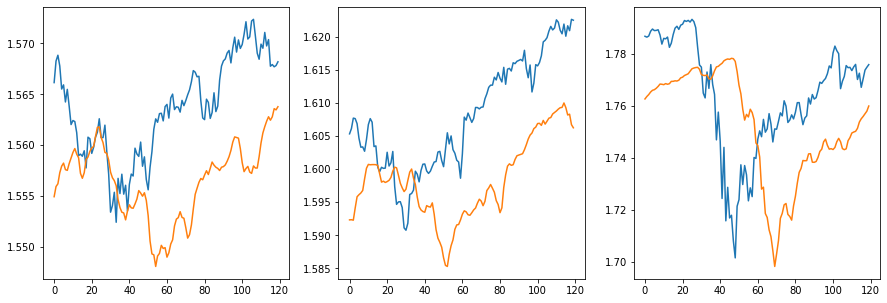

In [136]:
YLIM = (1.5, 1.9)
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(y_train[-120:])
plt.plot(fitted[-120:])
#plt.ylim(YLIM)

plt.subplot(132)
plt.plot(y_valid[-120:])
plt.plot(val_preds[-120:])
#plt.ylim(YLIM)

plt.subplot(133)
plt.plot(y_test[-120:])
plt.plot(preds[-120:]);
#plt.ylim(YLIM);

In [138]:
fitted.shape

(8918, 1)

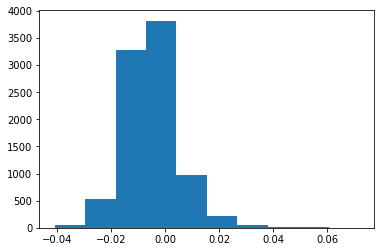

In [140]:
errors = (fitted.reshape(-1) - y_train)
plt.hist(errors);

In [144]:
mean_err = errors.mean()
median_err = np.median(errors)
mean_err, median_err

(-0.0049309954117134165, -0.005573506559465868)

In [145]:
def get_present(input_data, lookback, X=['^GSPC']):
    data = input_data.copy()
    Xi = [list(stockdat).index(x) for x in X]
    X = []
    for i in range(len(input_data)):
        t = []
        for j in range(lookback, 0, -1):
            t.append(input_data[[i - j], Xi])
    X.append(t)
    X = np.array(X)
    return X

In [146]:
now = get_present(input_data, LOOKBACK, X=USE)

In [147]:
now.shape

(1, 60, 2)

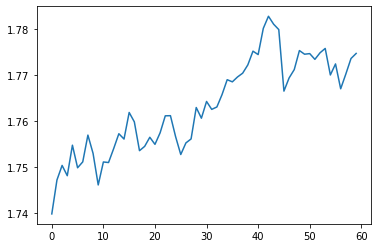

In [148]:
plt.plot(now[0, :, 0]);

In [149]:
pred = mod.predict(now)
pred

array([[1.7599655]], dtype=float32)

In [150]:
change = (pred / now[0, -1, 0]) - 1
change

array([[-0.0083341]], dtype=float32)

In [151]:
pred_adj = pred - mean_err
pred_adj

array([[1.7648965]], dtype=float32)

In [152]:
change_adj = (pred_adj / now[0, -1, 0]) - 1
change_adj

array([[-0.00555569]], dtype=float32)